<a href="https://colab.research.google.com/github/Thirumalkshatriya/Sanjay-Practice/blob/master/Linear_Regression_Analysis_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6: Regression Analysis

In this notebook we will see how regression analysis can help to **understand the data behavior**, to **predict data values** (continuous or discrete), and to **find important predictors** (sparse models).
We present four different regression models: Simple linear regression, Multiple linear regression, Polynomial regression and Logistic regression.
We evaluate the analysis results **qualitatively** by means of Seaborn visualization tools and **quantitatively** by means Scikit-learn library, as well as other toolboxes.

We use three real data sets to present practical cases:
* Practical case 1: Sea Ice Extent and Climate Change
* Practical case 2: Prediction of the Price of a New Housing Data Market
* Practical case 3: Winning or Losing Football Team


Before starting, we can define some settings for the notebook:

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import matplotlib.pylab as plt
%matplotlib inline
plt.rc('text', usetex = True)
plt.rc('font', family = 'times')
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('font', size = 12)
plt.rc('figure', figsize = (12, 5))

In [ ]:
import numpy as np

### Notation

$x_i$ element of a vector, $\textbf{x}$ column vector, $\textbf{x'}$ (transpose of $\textbf{x}$) row vector, $X$ matrix.

# Linear Regression Model

The simplest model we can think of is the **linear model**, where the response $\textbf{y}$ depends linearly from the predictors $\textbf{x}_i$:

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_d \textbf{x}_{d}$$

The $a_i$ are termed *parameters* of the model or *coefficients*. This variable captures all other factors which influence the dependent variable $ \textbf{y}$ other than the predictors $ \textbf{x}$.

This equation can be rewritten in a more compact (matricial) form as

$$ \textbf{y}  = X \textbf{w}$$

where $$ \textbf{y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right),
 X = \left( \begin{array}{c} x_{11}  \dots x_{1d} \\ x_{21}  \dots x_{2d}\\ \vdots \\ x_{n1}  \dots x_{nd} \end{array} \right),  \textbf{w} = \left( \begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_d \end{array} \right) $$

 **Linear regression** is the technique for creating linear models.

### Simple and Multiple Linear Regression Model

In the **simple** linear regression, with a single variable, we describe the relationship between the predictor and the response with a straight line.

The model is:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1,$$

where the parameter $a_0$ is called the *constant term* or the *intercept*. In the matricial form we add a constant term by changing to the matrix: $(\textbf{1},X).$

With simple linear regression we describe the relationship between the variable and the response with a straight line. In the case of **multiple** linear regression, we extend this idea by fitting an $d$-dimensional hyperplane to our $d$ variables, as defined in previous Equation.

#### Example:

Does the insurance price depend on the driving experience?

Given the following information, the monthly auto insurance prices ($\textbf{y}$) and driving experiences in years ($\textbf{x}_{1}$) of a set of n=8 subjects, we can build a linear model to answer this question.


We can also predict the monthly auto insurance price for a driver with 20 years of driving experience.




In [ ]:
x = [5, 2, 12, 9, 15, 6, 25, 16, 23] # Driving experience (years).
y = [65, 89, 50, 73, 45, 55, 38, 61, 35] # Monthly Auto Insurance

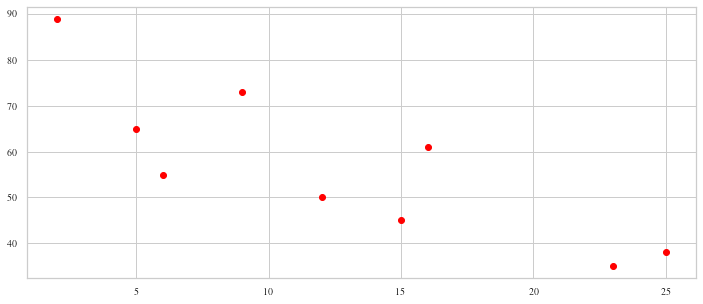

In [ ]:
plt.scatter(x, y, color = 'red')

Let's generate a set of data to illsutrate simple linear regression

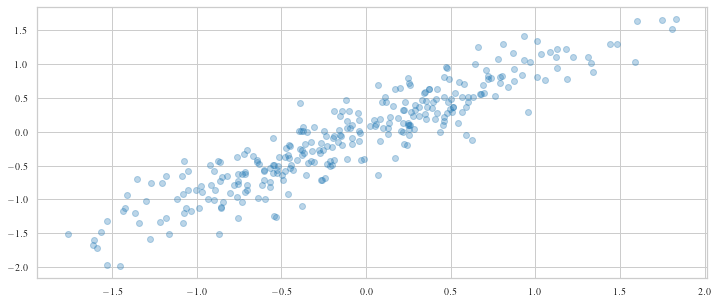

In [ ]:
X1 = np.random.randn(300, 2)  # Random points sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]])
X2 = np.dot(X1, A)
plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.3) # alpha, blending value, between 0 (transparent) and 1 (opaque).

We can create a linear model to explain the data

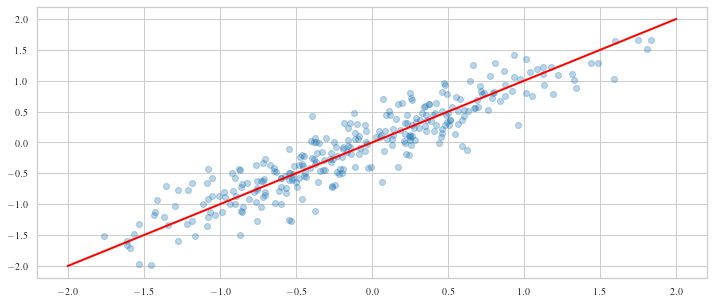

In [ ]:
model = [0+1*x for x in np.arange(-2,3)]
plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.3);
plt.plot(np.arange(-2,3), model, 'r');
plt.show()
# The red line gives the predicted values of this model

But there are other linear models. Which is the best model for a set of samples?

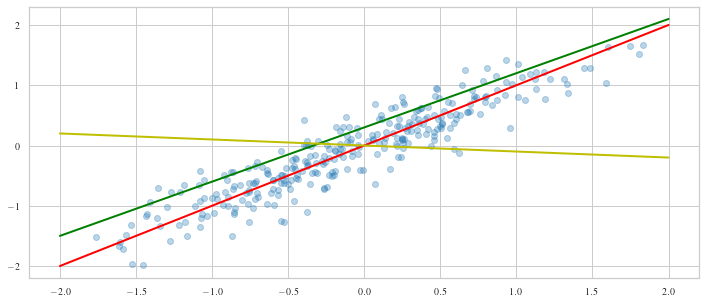

In [ ]:
plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.3);
# We can use several parameters and we do not know which is the best model
model1 = [0+1*x for x in np.arange(-2,3)]
model2 = [0.3+0.9*x for x in np.arange(-2,3)]
model3 = [0-0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1, 'r')
plt.plot(np.arange(-2,3), model2, 'g')
plt.plot(np.arange(-2,3), model3, 'y')
#plt.savefig("files/ch06/ExSimpleRegModels.png", dpi = 300, bbox_inches = 'tight')

#### Which is the best model for a set of samples?

### OLS (Ordinary Least Squares)

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the coefficients $a$'s
of the simple linear regression: $\textbf{y} = a_0+a_1 \textbf{x}$,
are chosen to minimize the **square of the distance between the predicted values and the actual values**.

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||a_0 +  a_1 \textbf{x}_1 -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{1j} -  y_j )^2,$$ with respect to $a_0, a_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.


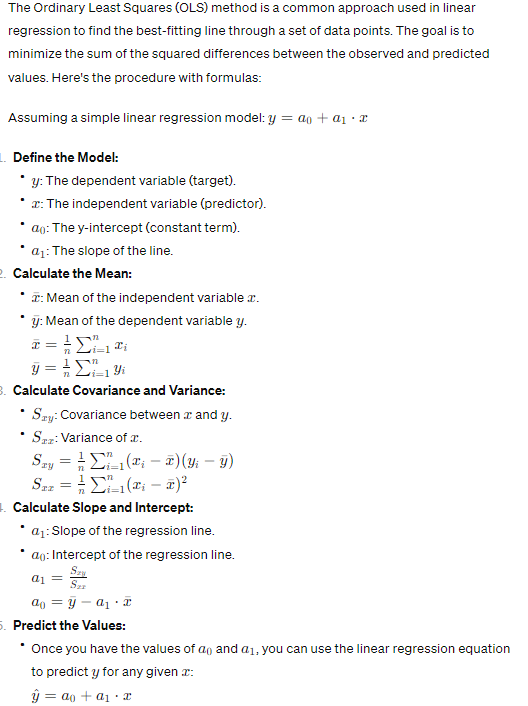

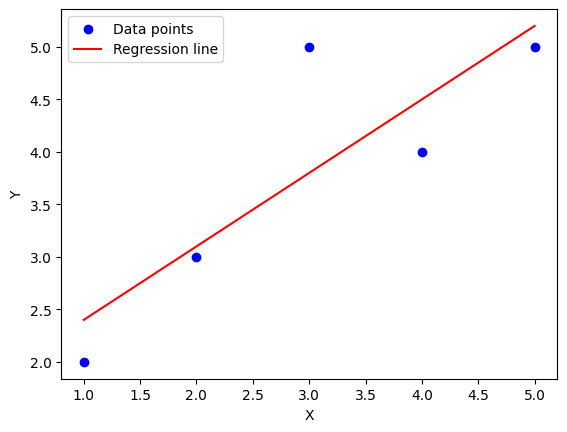

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ordinary_least_squares(x, y):
    # Calculate the means
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculate the covariance and variance
    S_xy = np.sum((x - x_mean) * (y - y_mean))
    S_xx = np.sum((x - x_mean) ** 2)

    # Calculate the slope (a1) and intercept (a0)
    a1 = S_xy / S_xx
    a0 = y_mean - a1 * x_mean

    return a0, a1

# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 5])

# Apply Ordinary Least Squares
intercept, slope = ordinary_least_squares(x, y)

# Plot the data points
plt.scatter(x, y, color='blue', label='Data points')

# Plot the regression line
regression_line = intercept + slope * x
plt.plot(x, regression_line, color='red', label='Regression line')

# Display the results
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


 The Ordinary Least Squares (OLS) method used in linear regression is not an iterative optimization algorithm in its basic form. It is a closed-form solution that directly calculates the values of the coefficients (slope and intercept) that minimize the sum of squared differences between the observed and predicted values.

#### How to compute the OLS using Scipy.optimize
downhill simplex algorithm
Nelder-Mead simplex algorithm to find the minimum of function of one or more variables.

This algorithm has a long history of successful use in applications. But it will usually be slower than an algorithm that uses first or second derivative information. In practice, it can have poor performance in high-dimensional problems and is not robust to minimizing complicated functions. Additionally, there currently is no complete theory describing when the algorithm will successfully converge to the minimum, or how fast it will if it does. Both the ftol and xtol criteria must be met for convergence.

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(0.0, 20.0)

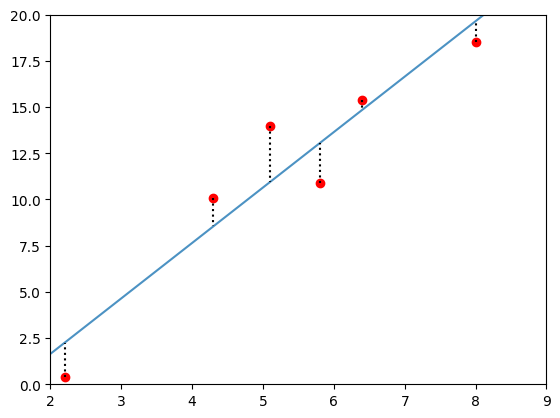

In [ ]:
from scipy.optimize import fmin
import numpy as np
import matplotlib.pyplot as plt
x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])

# Minimize the sum of squares using a lambda function

sse = lambda a, x, y: np.sum((a[0] + a[1]*x - y) ** 2) # Store the sum of squared differences function
# Lambda function is a small anonymous function.
# It can take any number of arguments, but can only have one expression.
# Syntax "lambda arguments : expression"

a0,a1 = fmin(sse, [0,1], args=(x,y)) # Minimize the sum of squared differences
# [0,1] is the initial guess for a[0] and a[1] in function sse.

plt.plot(x, y, 'ro')
plt.plot([0,10], [a0, a0+a1*10], alpha=0.8) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, a0+a1*xi], "k:") # Add pointed black line to illustrate the errorsThis line of code is using the `plot` function from the `matplotlib.pyplot` module to create a plot. Let's break down the components:


#`[xi]*2`: This creates a list where the value `xi` is repeated twice.
#This is done to create two x-coordinates for the line segment to be plotted.

#[yi, a0+a1*xi]`: This creates a list containing the y-coordinates for the line segment to be plotted. `
#yi` is the y-coordinate of the first point, and `a0+a1*xi` is the y-coordinate of the second point.


#`"k:"`: This specifies the color and style of the line.
#In this case, `"k:"` means a black dashed line.
#The first character specifies the color (in this case, "k" for black),
#and the second character specifies the line style (in this case, ":" for a dashed line).


plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain
#plt.savefig("files/ch06/ExYErrors.png", dpi = 300, bbox_inches = 'tight')

The pointed black lines illustrate the vertical errors which are minimized.

**Note**: There are alternatives of errors-in-variables regression models as the **total least squares**.

### Other estimators

We can minimize other criteria, such as the sum of absolute differences between the predicted values and the actual values (**sum of absolute errors (SAE)**).

$$  \sum_{j=1}^n |a_0+a_1 x_{1j} -  y_j|,$$ with respect to $a_0, a_1$.

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77


(0.0, 20.0)

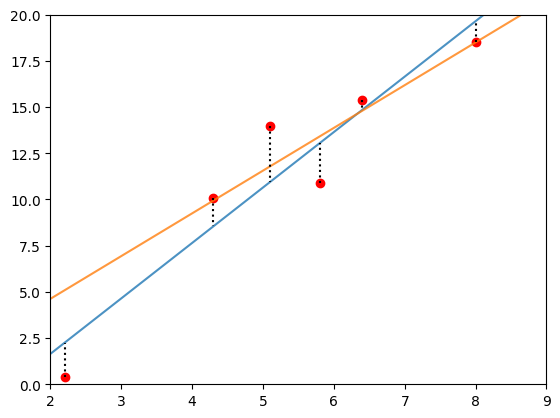

In [ ]:
# Your code goes here

x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])

# Minimize the sum of squares using a lambda function

sae = lambda b, x, y: np.sum(abs(b[0] + b[1]*x - y)) # Store the sum of absolute differences function
# Lambda function is a small anonymous function.
# It can take any number of arguments, but can only have one expression.
# Syntax "lambda arguments : expression"

b0,b1 = fmin(sae, [0,1], args=(x,y)); # Minimize the sum of absolute errors
# [0,1] is the initial guess for b[0] and b[1] in function sse.

plt.plot(x, y, 'ro')
plt.plot([0,10], [a0, a0+a1*10], alpha=0.8) # Add the regression line (sse), colored in blue
plt.plot([0,10], [b0, b0+b1*10], alpha=0.8) # Add the regression line (sae), colored in orange

for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, a0+a1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain
#plt.savefig("files/ch06/ExYErrors_SSE_SAE.png", dpi = 300, bbox_inches = 'tight')

We know that in any machine learning project our main aim relies on how good our project accuracy is or how much our model prediction differs from the actual data point. Based on the difference between model prediction and actual data points we try to find the parameters of the model which give better accuracy on our dataset\, In order to find these parameters we apply gradient descent on the cost function of the machine learning model.
The main aim of gradient descent is to find the best parameters of a model which gives the highest accuracy on training as well as testing datasets. In gradient descent, The gradient is a vector that points in the direction of the steepest increase of the function at a specific point. Moving in the opposite direction of the gradient allows the algorithm to gradually descend towards lower values of the function, and eventually reaching to the minimum of the function.
Steps Required in Gradient Descent Algorithm

Step 1 we first initialize the parameters of the model randomly

Step 2 Compute the gradient of the cost function with respect to each
parameter. It involves making partial differentiation of cost function with respect to the parameters.

Step 3 Update the parameters of the model by taking steps in the opposite direction of the model. Here we choose a hyperparameter learning rate which is denoted by alpha. It helps in deciding the step size of the gradient.

Step 4 Repeat steps 2 and 3 iteratively to get the best parameter for the defined model

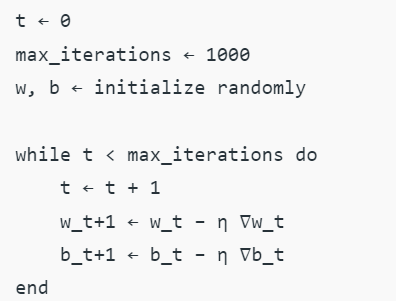

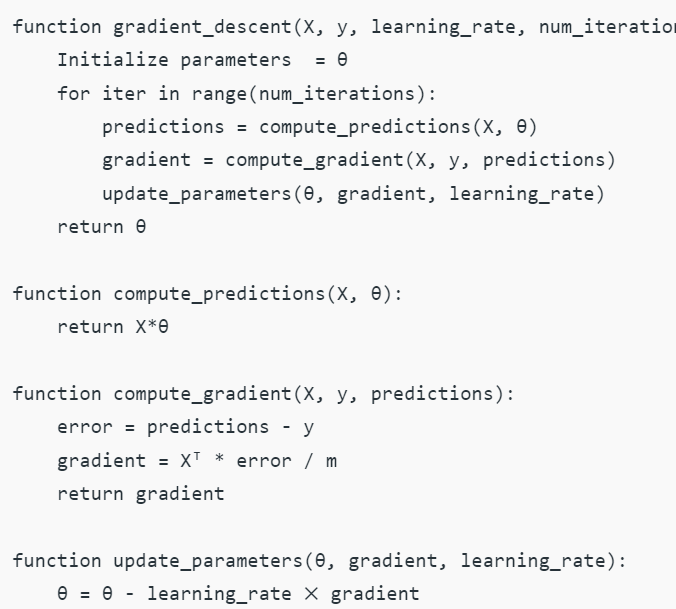

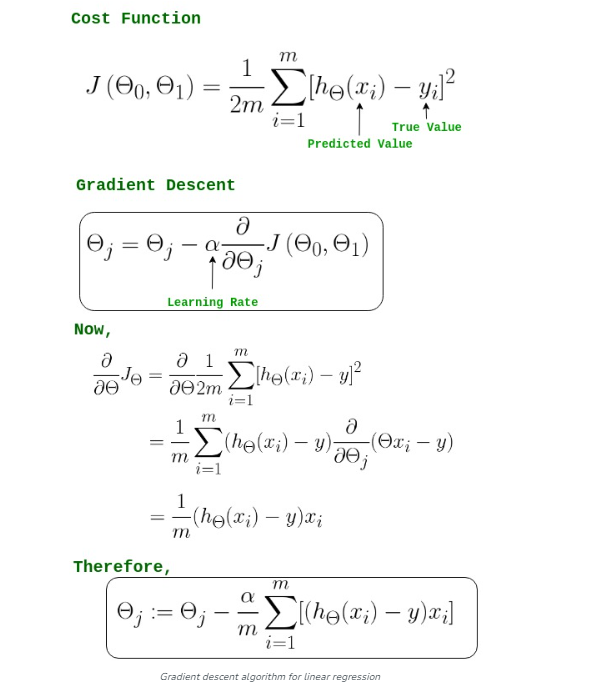

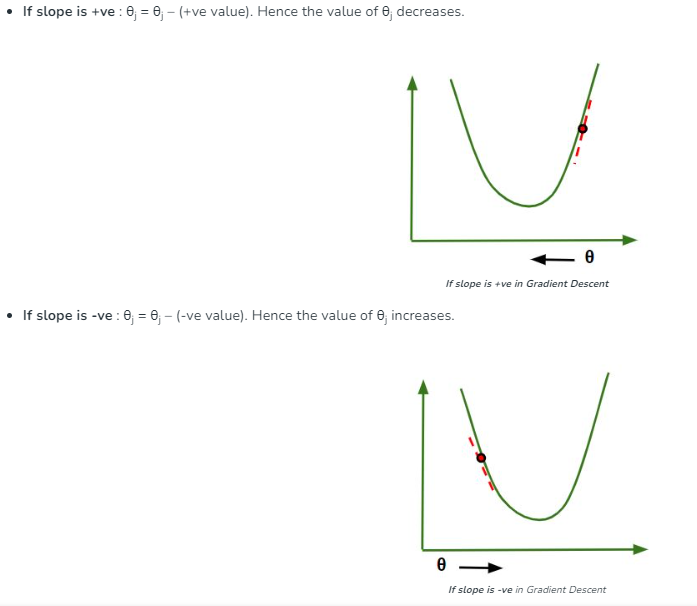

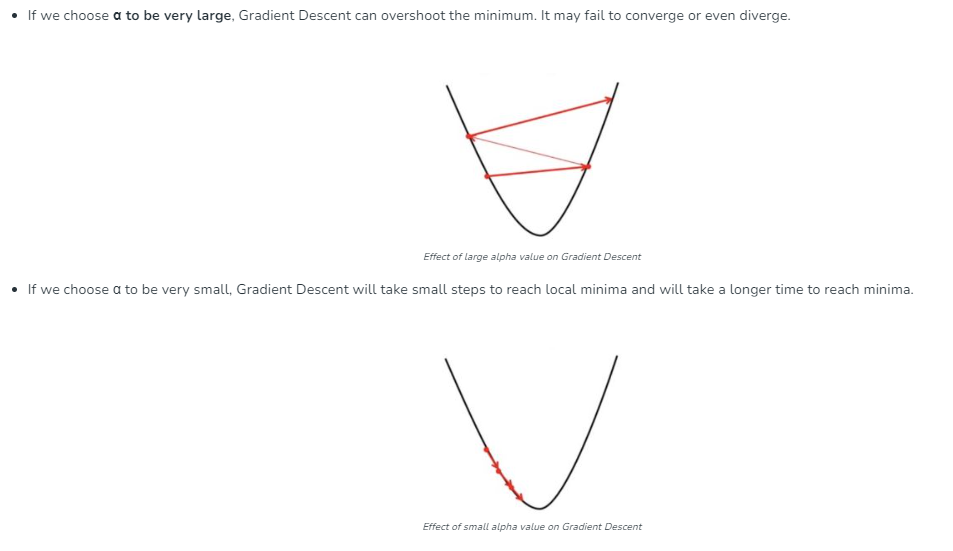

100 epochs elapsed
Current accuracy is : 0.9836456109008862
Do you want to stop (y/*)??y


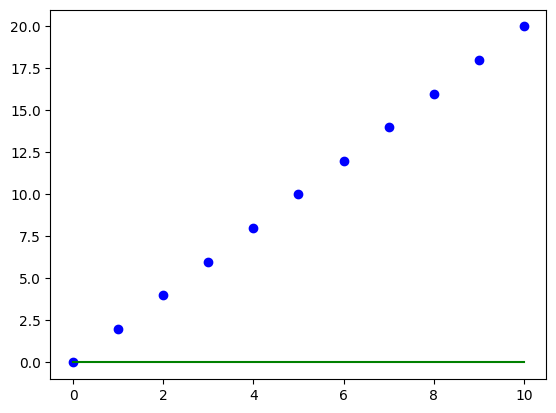

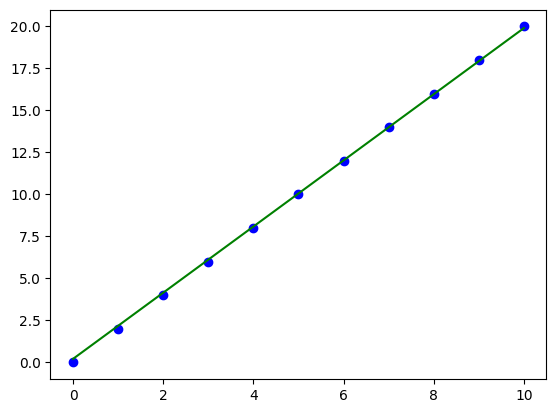

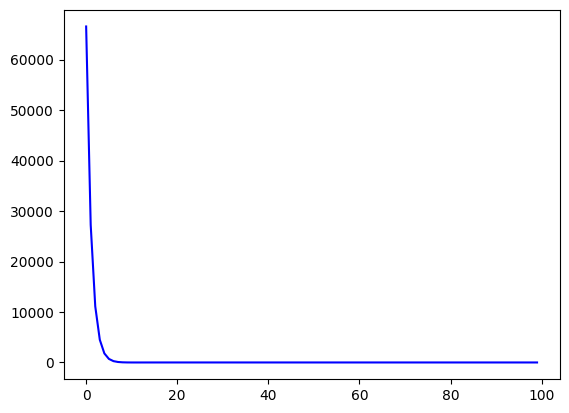

In [ ]:
# Implementation of gradient descent in linear regression
import numpy as np
import matplotlib.pyplot as plt


class Linear_Regression:
	def __init__(self, X, Y):
		self.X = X
		self.Y = Y
		self.b = [0, 0]

	def update_coeffs(self, learning_rate):
		Y_pred = self.predict()
		Y = self.Y
		m = len(Y)
		self.b[0] = self.b[0] - (learning_rate * ((1/m) *
												np.sum(Y_pred - Y)))

		self.b[1] = self.b[1] - (learning_rate * ((1/m) *
												np.sum((Y_pred - Y) * self.X)))

	def predict(self, X=[]):
		Y_pred = np.array([])
		if not X:
			X = self.X
		b = self.b
		for x in X:
			Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

		return Y_pred

	def get_current_accuracy(self, Y_pred):
		p, e = Y_pred, self.Y
		n = len(Y_pred)
		return 1-sum(
			[
				abs(p[i]-e[i])/e[i]
				for i in range(n)
				if e[i] != 0]
		)/n
	# def predict(self, b, yi):

	def compute_cost(self, Y_pred):
		m = len(self.Y)
		J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
		return J

	def plot_best_fit(self, Y_pred, fig):
		f = plt.figure(fig)
		plt.scatter(self.X, self.Y, color='b')
		plt.plot(self.X, Y_pred, color='g')
		f.show()


def main():
	X = np.array([i for i in range(11)])
	Y = np.array([2*i for i in range(11)])

	regressor = Linear_Regression(X, Y)

	iterations = 0
	steps = 100
	learning_rate = 0.01
	costs = []

	# original best-fit line
	Y_pred = regressor.predict()
	regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')

	while 1:
		Y_pred = regressor.predict()
		cost = regressor.compute_cost(Y_pred)
		costs.append(cost)
		regressor.update_coeffs(learning_rate)

		iterations += 1
		if iterations % steps == 0:
			print(iterations, "epochs elapsed")
			print("Current accuracy is :",
				regressor.get_current_accuracy(Y_pred))

			stop = input("Do you want to stop (y/*)??")
			if stop == "y":
				break

	# final best-fit line
	regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

	# plot to verify cost function decreases
	h = plt.figure('Verification')
	plt.plot(range(iterations), costs, color='b')
	h.show()

	# if user wants to predict using the regressor:
	regressor.predict([i for i in range(10)])


if __name__ == '__main__':
	main()


As you can see, in this case, far values are penalized less.

### Model Evaluation

One of the key aspects of supervised machine learning is model evaluation and validation.
In the regression problem there are two popular measures for evaluation of the model fitting: the mean squared error ($MSE$) and the coefficient of determination ($R^2$) of the model.

The coefficient $R^2$ is defined as:
$$R^2 = (1 - \textbf{u}/\textbf{v}),$$
where $\textbf{u}$ is the residual sum of squares: $$\textbf{u}=\sum (\textbf{y} - \widehat{\textbf{y}} )^2$$ where ${\textbf{y}}$ is the observed response and $\widehat{\textbf{y}}$ is the predicted response.

And $\textbf{v}$ is the total sum of squares: $$\textbf{v}=\sum (\textbf{y} - \bar{\textbf{y}})^2,$$ where $\bar{\textbf{y}}$ is the mean of the observed data.

The best possible score for $R^2$ is 1.0 (when $\textbf{u}=0$): lower values are worse. $R^2$ is 0.0 when $\textbf{u}=\textbf{v}$.

The $MSE$ is defined as:
$$MSE = \frac{1}{n} \sum (\textbf{y} - \widehat{\textbf{y}} )^2.$$

#### Quantitative Predictions

As for any problem of supervised machine learning, after doing the fitting of a linear regression model we can do predictions (evaluation of new samples). When you evaluate the predictive performance of your model, it is essential that the process be unbiased. You can not evaluate the predictive performance of a model with the same data you used for the fitting. You need to evaluate the model with fresh data that has not been seen by the model before. This can be accomplish by splitting your dataset before you use it into training-(validation)-test.


In [ ]:
import pandas as pd
ice = pd.read_csv('market_fact.csv')
print('Shape:', ice.shape)
ice.head()

Shape: (8399, 10)


,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23.0,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13.0,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26.0,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43.0,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35.0,1219.87,26.30,0.38


Text(0, 0.5, 'Profit')

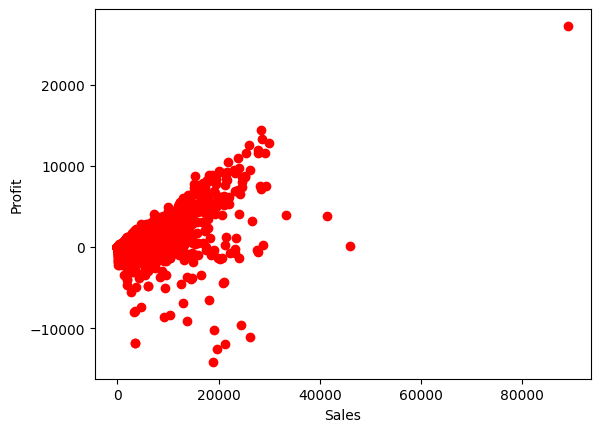

In [ ]:
# Visualize the data
import matplotlib.pylab as plt
x = ice.Sales
y = ice.Profit
plt.scatter(x, y, color = 'red')
plt.xlabel('Sales')
plt.ylabel('Profit')

In [ ]:
from sklearn.linear_model import LinearRegression

est = LinearRegression(fit_intercept = True)

x = ice[['Sales']]
y = ice[['Profit']]

est.fit(x, y)

print("Coefficients:", est.coef_)
print("Intercept:", est.intercept_)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
ice=ice.dropna()

In [ ]:
from sklearn.linear_model import LinearRegression

est = LinearRegression(fit_intercept = True)

x = ice[['Sales']]
y = ice[['Profit']]

est.fit(x, y)

print("Coefficients:", est.coef_)
print("Intercept:", est.intercept_)

Coefficients: [[0.19369235]]
Intercept: [-162.58888698]


MSE: 936586.2111645228
R^2: -0.9546199066923795
var: Profit    1.415923e+06
dtype: float64


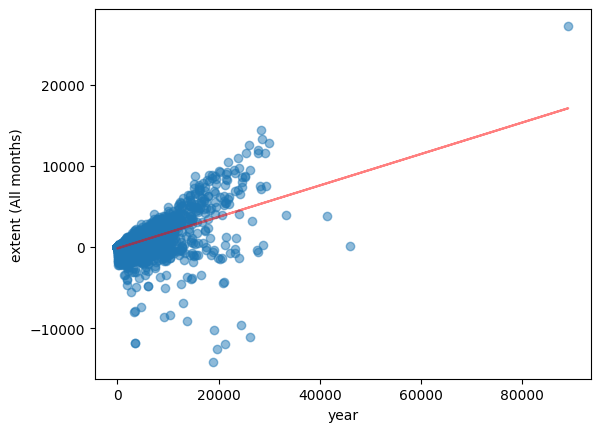

In [ ]:
from sklearn import metrics

# Analysis for all months together.
y_hat = est.predict(x)
plt.plot(x, y,'o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.xlabel('year')
plt.ylabel('extent (All months)')
print("MSE:", metrics.mean_squared_error(y_hat, y))
print("R^2:", metrics.r2_score(y_hat, y))
print("var:", y.var())

### Practical case 1: Sea Ice Data and Climate Change

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements from the [National Snow & Ice Data Center](https://nsidc.org/data/seaice\_index/archives.html).

We perform the following processing steps:

1) Read and clean the data.

2) Normalize the data to compute the tendency for a given interval of time (month).

3) Plot the values for the entire time series or for particular months.

4) Compute the trend using a simple linear regression (OLS) of Scikit-learn library and quantitatively evaluate it.

5) Estimate the extent value for 2025.


1) First, we must read and clean the data.

The file 'SeaIce.txt' is a ``Tab`` separated file containing:

    + Year:	4-digit year
    + mo:	1- or 2-digit month
    + data_type:	Input data set (Goddard/NRTSI-G)
    + region:	Hemisphere that this data covers (N: Northern; S: Southern)
    + extent:	Sea ice extent in millions of square km
    + area:	Sea ice area in millions of square km

In [ ]:
# Load the data and show the info and contents:
import pandas as pd
ice = pd.read_csv('files/ch06/SeaIce.txt', delim_whitespace = True)
print('Shape:', ice.shape)
ice.head()

Shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


To compute the anomaly for a given interval of time, we can compute the mean for that interval of time (using the period 1981 through 2010 for  the mean extend), before data cleaning.


In [ ]:
ice.mode(numeric_only=True).mean()
# Observation: a negative mean?!!

year      1996.000000
mo           6.500000
extent      13.497500
area         7.553333
dtype: float64

We need to clean the data.

Text(0, 0.5, 'Extent')

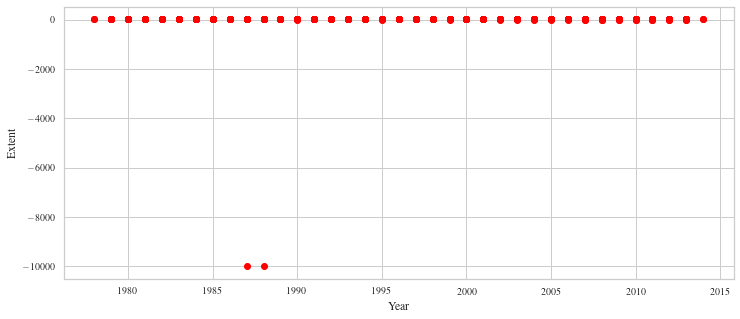

In [ ]:
# Visualize the data
x = ice.year
y = ice.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Year')
plt.ylabel('Extent')

We detect some outlier or missing data.

In [ ]:
print('Different values in data_type field:', np.unique(ice.data_type.values))   # there is a -9999 value!

Different values in data_type field: ['-9999' 'Goddard' 'NRTSI-G']


In [ ]:
# Let's see what type of data we have more than Goddard and NRTSI-G
print(ice[(ice.data_type != 'Goddard')
          & (ice.data_type != 'NRTSI-G')])

     year  mo data_type region  extent    area
9    1988   1     -9999      N -9999.0 -9999.0
397  1987  12     -9999      N -9999.0 -9999.0


shape: (422, 6)


Text(0, 0.5, 'Extent')

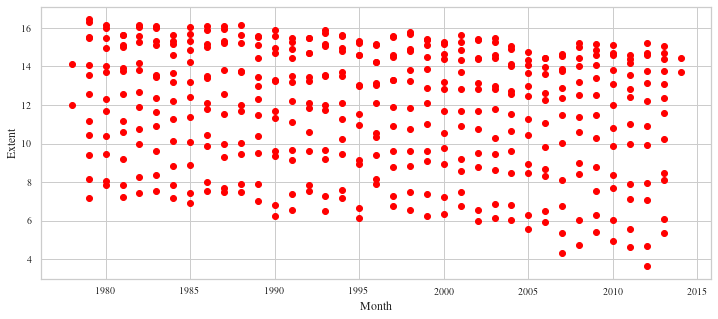

In [ ]:
# We can easily clean the data now:
ice2 = ice[ice.data_type != '-9999']
print('shape:', ice2.shape)
# And repeat the plot
x = ice2.year
y = ice2.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Month')
plt.ylabel('Extent')

2) To compute the tendency for a given interval of time (month) we need to normalize the data.

The ``lmplot()`` function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datesets. Input data must be in a Pandas ``DataFrame``. To plot them, we provide the predictor and response variable names along with the dataset

//anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


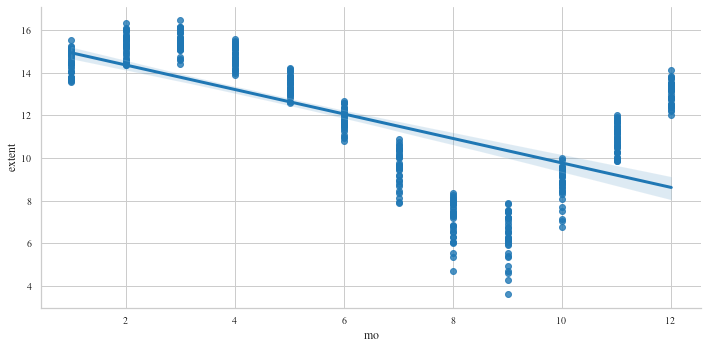

In [ ]:
sns.lmplot(x = "mo", y = "extent", data = ice2, aspect = 2);
plt.savefig("files/ch06/IceExtentCleanedByMonth.png", dpi = 300, bbox_inches = 'tight')

In [ ]:
# Compute the mean for each month.
grouped = ice2.groupby('mo')
month_means = grouped.extent.mean()
month_variances = grouped.extent.var()
print('Means:', month_means)
print('Variances:',month_variances)

Means: mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64
Variances: mo
1     0.304906
2     0.295804
3     0.237209
4     0.215378
5     0.189901
6     0.247918
7     0.679175
8     0.824577
9     1.143902
10    0.630361
11    0.412511
12    0.284870
Name: extent, dtype: float64


We can compute the mean for that interval of time (using the period 1981 through 2010 for the mean extend) and we subtract it from the mean extend for that interval. This value must be converted to percent difference by dividing it by the 1981-2010 average and then multiplying by 100.

In [ ]:
# Data normalization
for i in range(12):
    ice2.extent.loc[ice2.mo == i+1] = 100*(ice2.extent.loc[ice2.mo == i+1] - month_means[i+1])/month_means.mean()


/var/folders/z8/lf08cst56rv_dv3_7mrpfhcm0000gn/T/ipykernel_6139/1953638066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ice2.extent.loc[ice2.mo == i+1] = 100*(ice2.extent.loc[ice2.mo == i+1] - month_means[i+1])/month_means.mean()


//anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


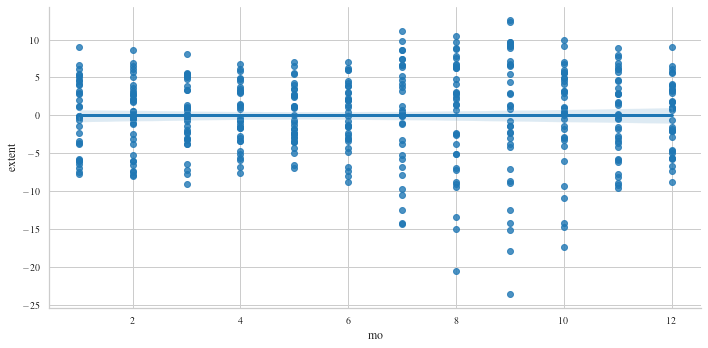

In [ ]:
sns.lmplot(x = "mo", y = "extent", data = ice2, aspect =2);
plt.savefig("files/ch06/IceExtentNormalizedByMonth.png", dpi = 300, bbox_inches = 'tight')

In [ ]:
print('mean:', ice2.extent.mean())
print('var:', ice2.extent.var())

mean: -7.745252569896827e-16
var: 31.983239774968798


3) These values can be plotted for the entire time series or for particular months.

Let us consider the entiere year

//anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


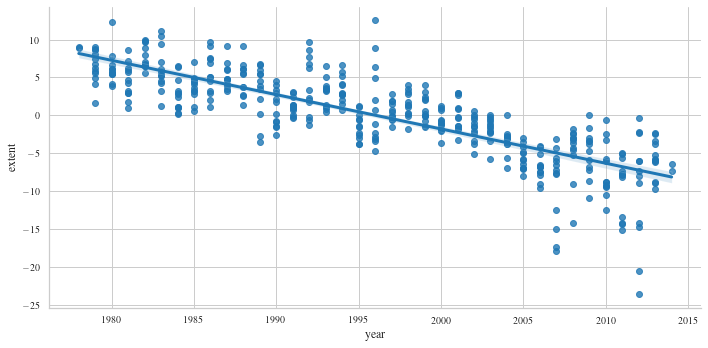

In [ ]:
sns.lmplot(x = "year", y = "extent", data = ice2, aspect = 2);
plt.savefig("files/ch06//IceExtentAllMonthsByYearlmplot.png", dpi = 300, bbox_inches = 'tight')

//anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


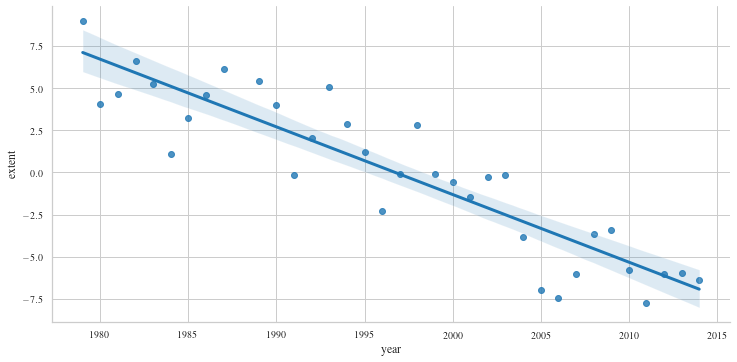

In [ ]:
#For January
jan = ice2[ice2.mo == 1];
sns.lmplot(x = "year", y = "extent", data = jan, height = 5.2, aspect = 2);

//anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


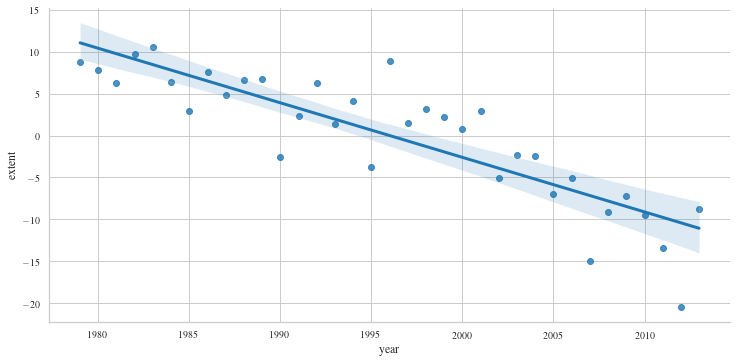

In [ ]:
# For August
aug = ice2[ice2.mo == 8]
sns.lmplot(x = "year", y = "extent", data = aug, height = 5.2, aspect = 2);

In [ ]:
# Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.
import scipy.stats
scipy.stats.pearsonr(ice2.year.values, ice2.extent.values)

(-0.8183500709897176, 4.449231816871353e-103)

4) We can also compute the trend using a simple linear regression (OLS) of Scikit-learn library and quantitatively evaluate it.

For that we use **Scikit-learn**, library that provides a variety of both supervised and unsupervised machine learning techniques.
Scikit-learn provides an object-oriented interface centered around the concept of an Estimator.
The <code>Estimator.fit</code> method sets the state of the estimator based on the training data. Usually, the data is comprised of a two-dimensional numpy array $X$ of shape <code>(n_samples, n_predictors)</code> that holds the so-called feature matrix and a one-dimensional numpy array $\textbf{y}$ that holds the responses. Some estimators allow the user to control the fitting behavior.
For example, the <code>sklearn.linear_model.LinearRegression</code> estimator allows the user to specify whether or not to fit an intercept term. This is done by setting the corresponding constructor arguments of the estimator object.
During the fitting process, the state of the estimator is stored in instance attributes that have a trailing underscore ('_'). For example, the coefficients of a LinearRegression estimator are stored in the attribute coef_.

Estimators that can generate predictions provide a ``Estimator.predict`` method.
In the case of regression, ``Estimator.predict`` will return the predicted regression values, $\hat{\textbf{y}}$.

In [ ]:
from sklearn.linear_model import LinearRegression

est = LinearRegression(fit_intercept = True)

x = ice2[['year']]
y = ice2[['extent']]

est.fit(x, y)

print("Coefficients:", est.coef_)
print("Intercept:", est.intercept_)

Coefficients: [[-0.45275459]]
Intercept: [903.71640207]


Quantitative evaluation:

We can evaluate the model fitting by computing the mean squared error ($MSE$) and the coefficient of determination ($R^2$) of the model.

These measures can provide a quantitative answer to the question we are facing: Is there a negative trend in the evolution of sea ice extent over recent years?

MSE: 10.539131639803488
R^2: 0.5067870382100248
var: extent    31.98324
dtype: float64


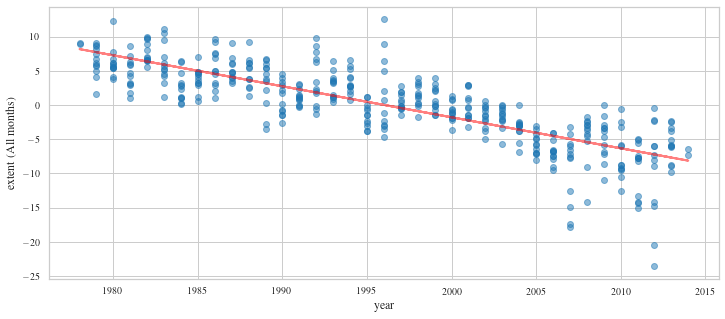

In [ ]:
from sklearn import metrics

# Analysis for all months together.
y_hat = est.predict(x)
plt.plot(x, y,'o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.xlabel('year')
plt.ylabel('extent (All months)')
print("MSE:", metrics.mean_squared_error(y_hat, y))
print("R^2:", metrics.r2_score(y_hat, y))
print("var:", y.var())

We can conclude that the data show a long-term negative trend in recent years.


MSE: 3.8395160752867565
R^2: 0.7810636041396216


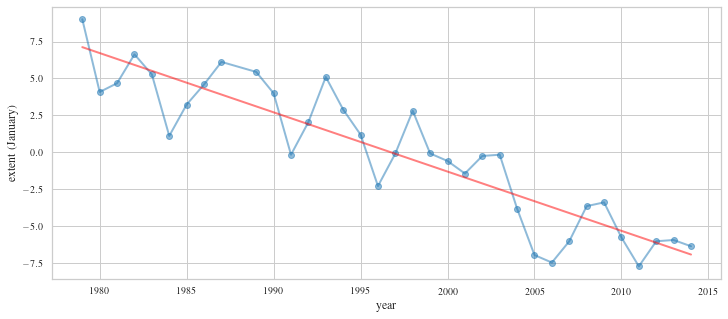

In [ ]:
# Analysis for a particular month.
x = jan[['year']]
y = jan[['extent']]

model = LinearRegression()
model.fit(x, y)

y_hat = model.predict(x)

plt.figure()
plt.plot(x, y,'-o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.xlabel('year')
plt.ylabel('extent (January)')

print("MSE:", metrics.mean_squared_error(y_hat, y))
print("R^2:", metrics.r2_score(y_hat, y))

5) We can also estimate the extent value for the year 2025.

For that we use the function predict of the model.
Here, all the available data is used as training set and the test set is just the year 2025.

In [ ]:
X = np.array([2025]).reshape(-1,1)
y_hat = model.predict(X)
j = 1 # January
# Original value (before normalization)
y_hat = (y_hat*month_means.mean()/100) + month_means[j]
print("Prediction of extent for January 2025 (in millions of square km):", y_hat)

Prediction of extent for January 2025 (in millions of square km): [[13.14449923]]


## Polynomial Regression

Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

A very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial.

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_d \phi(\textbf{x}_d) $$

The higher the order of the polynomial the more "wigglier" functions you can fit.

Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

## Regularization models and Sparse models



### L2 Regularization: Ridge Regression.

Ridge Regression penalizes the coefficients if they are too far from zero, thus enforcing them to be small in a continuous way. This way, it decreases model complexity while keeping all variables in the model.

$$ minimize(\sum_{i=0}^n (a_0 + \sum_{j=1}^d a_jx_{ij} - y_i)^2 + \alpha\sum_{j=1}^d a_j^2) $$
where $a_j$ are the regression coefficients.


### L1 Regularization: Lasso Regression

Often, in real problems, there are uninformative variables in the data which prevent proper modeling of the problem and thus, the building of a correct regression model. In such cases, a feature selection process is crucial to select only the informative features and discard non-informative ones. This can be achieved by sparse methods which use a penalization approach, such as *Lasso* (least absolute shrinkage and selection operator) to set some model coefficients to zero (thereby discarding those variables). Sparsity can be seen as an application of Occam’s razor: prefer simpler models to complex ones.

For that, Lasso regression adds a **$\ell_1$-norm** regularization term to the sum of squared errors of prediction (SSE).  Given the set of samples  (𝑋,𝐲) , the objetive is to minimize:

$$ minimize(\sum_{i=0}^n (a_0 + \sum_{j=1}^d a_jx_{ij} - y_i)^2 + \alpha\sum_{j=1}^d|a_j|)$$



## Practical case 2: Boston Housing Data

The Boston housing data set provides records measurements of 13 attributes of housing markets around Boston, as well as the median price. We want to predict the price of a market given a set of attributes.



To start with we load and visualize the data.

In [ ]:
from sklearn import datasets
boston = datasets.load_boston() # Dictionary-like object that exposes its keys as attributes.
X_boston, y_boston = boston.data, boston.target # Create X matrix and y vector from the dataset.
features = boston.feature_names
print('Feature names: {}'.format(boston.feature_names))
print('Shape of data: {} {}'.format(X.shape, y.shape))

Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Shape of data: (1, 1) (35, 1)


In [ ]:
print('Keys:', boston.keys())
print(boston.DESCR)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
       

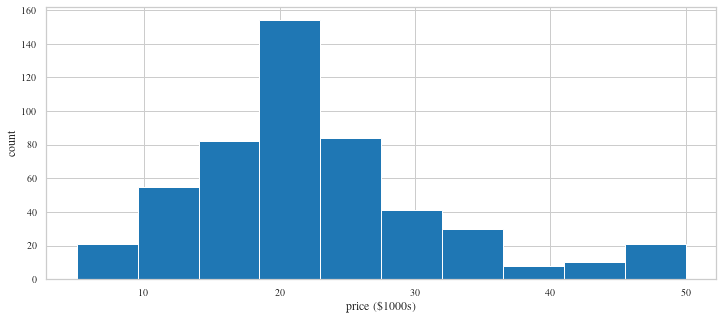

In [ ]:
# Histogram of prices:
plt.hist(y_boston)
plt.xlabel('price (\$1000s)')
plt.ylabel('count')
plt.savefig("files/ch06/Boston_histogram.png", dpi = 300, bbox_inches = 'tight')

### Tasks:

<ul>
<li> Task 1: Predict median house values in the Boston area using a single predictor. Perform visualizations to show linear relationships.</li>
<li> Task 2: Estimate the prediction of the price using multiple linear regression models. Analyze how good the regression is.</li>
</ul>

### Task 1:

We first consider the task of predicting **median house values** in the Boston area using as the predictor one of the attributes, for instance, **LSTAT**, defined as the "proportion of lower status of the population".
<ul>
<li>Visualize the data we want to fit</li>
<li>Fit a simple linear regression using variable LSTAT to predict Price</li>
</ul>

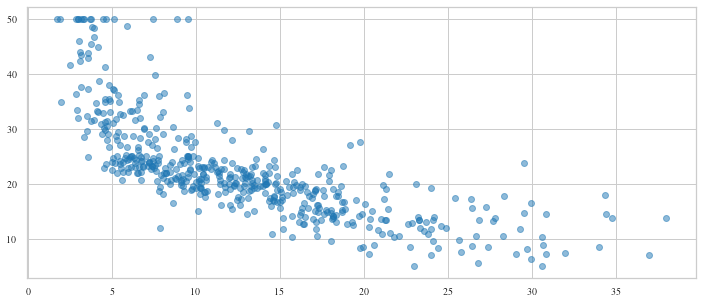

In [ ]:
X = df_boston.LSTAT.values.reshape(-1, 1)
y = df_boston.PRICE.values

plt.plot(X, y, "o", alpha=.5)

//anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


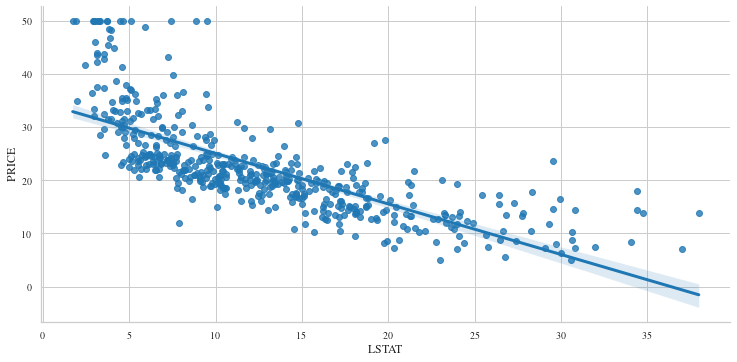

In [ ]:
# Visualization of the relations between price and LSTAT
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['PRICE'] = boston.target
sns.lmplot(x = "LSTAT", y =  "PRICE", data = df_boston, height = 5.2, aspect = 2);
plt.savefig("files/ch06/lmplotBostonLSTAT.png", dpi = 300, bbox_inches = 'tight')

It is important to know that lmplot has two main components.

+ The first is a scatterplot, showing the observed datapoints.
+ The second is a regression line, showing the estimated linear model relating the two variables. Because the regression line is only an estimate, it is plotted with a 95% confidence band to give an impression of the certainty in the model (using Bootstraping).

//anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


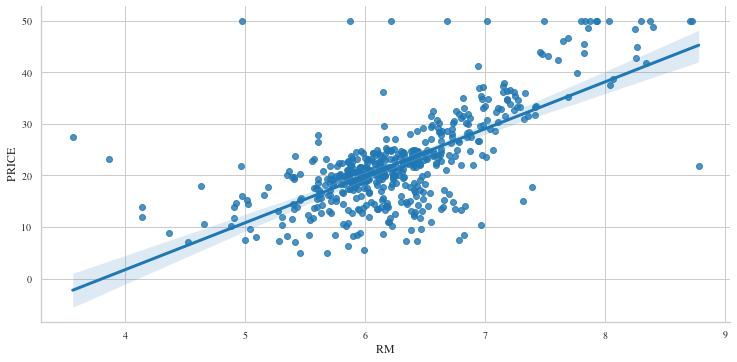

In [ ]:
# Visualization of the relations between price and RM
sns.lmplot(x = "RM",y = "PRICE", data = df_boston, height = 5.2, aspect = 2);

//anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


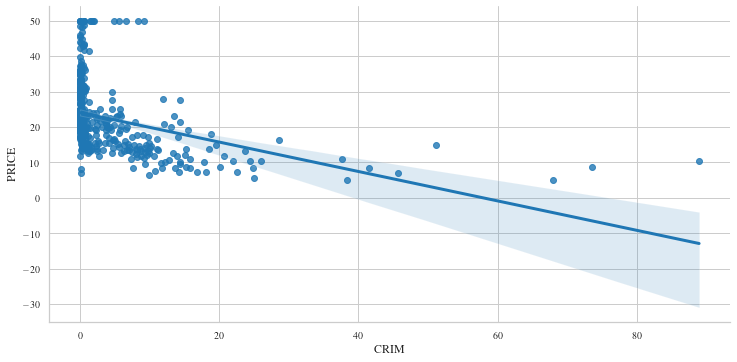

In [ ]:
# Visualization of the relations between price and CRIM
sns.lmplot(x = "CRIM", y = "PRICE", data = df_boston, height = 5.2, aspect = 2);

//anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


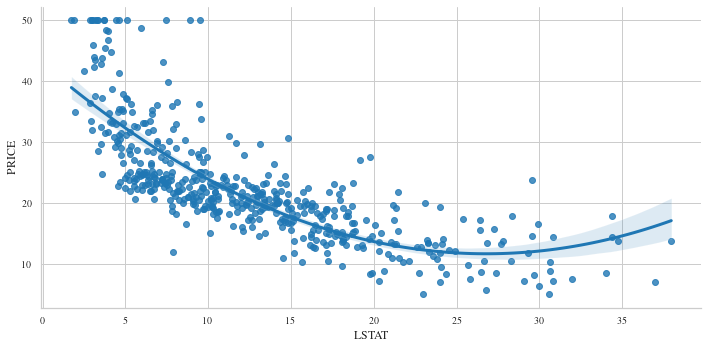

In [ ]:
sns.lmplot(x = "LSTAT", y = "PRICE", data = df_boston, order = 2,  aspect = 2);
plt.savefig("files/ch06/lmplotBostonLSTAT_order2.png", dpi = 300, bbox_inches = 'tight')

//anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


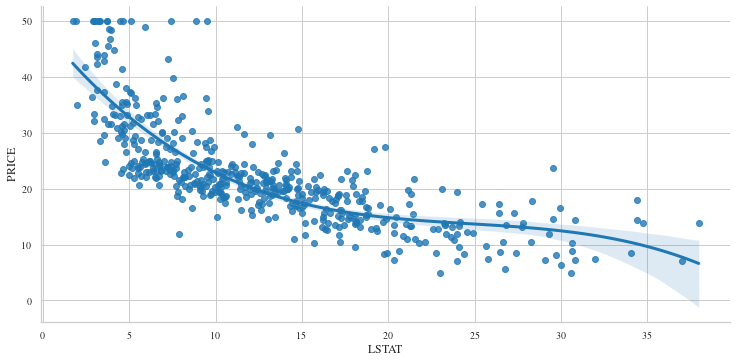

In [ ]:
sns.lmplot(x = "LSTAT",y = "PRICE", data = df_boston, order = 3, height = 5.2, aspect = 2);
plt.savefig("files/ch06/lmplotBostonLSTATorder3.png", dpi = 300, bbox_inches = 'tight')

### More visualizations

Plot variable relationships with correlation matrix and scatter plot using Seaborn.



#### Heatmap

We can also use corrplot function for plotting a diagonal correlation matrix.

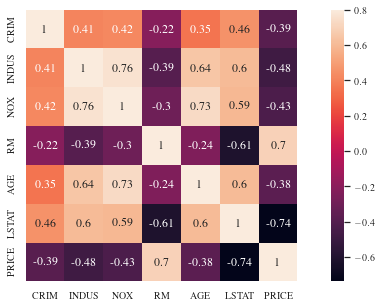

In [ ]:
# Draw a heatmap
features2 = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'LSTAT', 'PRICE'] # To plot just 7 of the 13 variables: PRICE, LSTAT, AGE, RM, NOX, INDUS, CRIM.
df_boston2 = df_boston[features2]
corrmat = df_boston2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.savefig("files/ch06/corrplot.png", dpi = 300, bbox_inches = 'tight')

Using correlaton matrix heatmap we can observe that "RM" and "LSTAT" are the variables more correlated with "Price".

#### Scatter plot

Let's explore multiple variables with scatter plot
The scatter plot of Pandas is a grid of plots of multiple varaibles one against the other, showing the relationship of each variable to the others.

For the sake of visualization, we choose 3 from the set of 13 variables (RM, AGE, LSTAT):

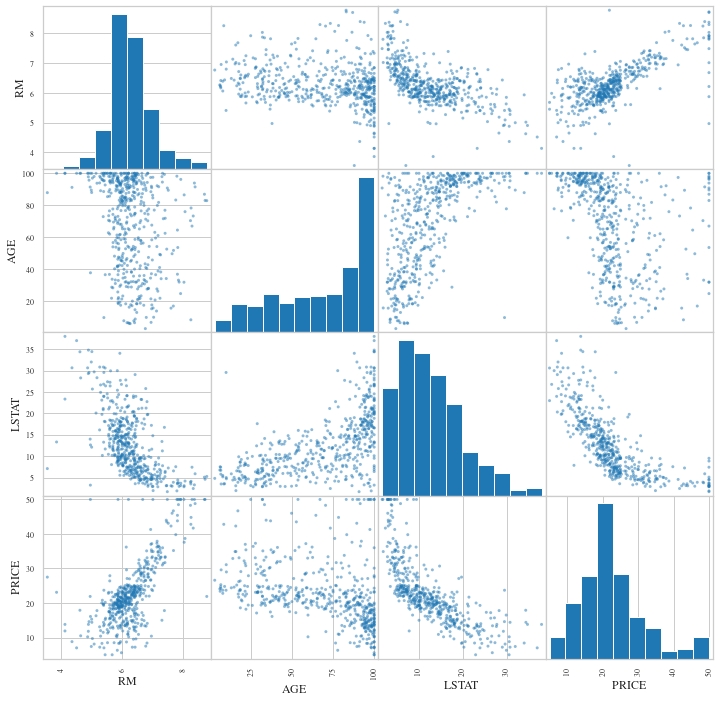

In [ ]:
features3 = ['RM','AGE','LSTAT', 'PRICE']
df_boston3 = df_boston[features3]
pd.plotting.scatter_matrix(df_boston3, figsize=(12.0,12.0))
plt.savefig("files/ch06/scatterplotBoston.png", dpi = 300, bbox_inches = 'tight')

### Task 2:

Fitting multiple linear regression models for prediction with all variables.
Use Scikit-learn library for predictions and quantitative evaluation.

First, we use train_test_split() from scikit-learn to split the dataset into subsets (train and test) and minimize the potential for bias in the evaluation and validation process.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

seed = 1 # Let's make our predictions deterministic

X_boston,y_boston = boston.data, boston.target # Create X matrix and y vector from the complete dataset.
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.5, random_state=seed)

print('Train and test sizes of X: {} {}'.format(X_train.shape, X_test.shape))
print('Train and test sizes of y: {} {}'.format(y_train.shape, y_test.shape))


Train and test sizes of X: (253, 13) (253, 13)
Train and test sizes of y: (253,) (253,)


In [ ]:
# Fitting a multiple linear model
lr = LinearRegression() # Create the Linear Regression estimator
lr.fit(X_train, y_train) # Perform the fitting

# Regrerssion coefs
coefs_lr = pd.Series(np.abs(lr.coef_), features).sort_values()

# Prediction
y_test_pred = lr.predict(X_test)

# evaluation
mse = mean_squared_error(y_test, y_test_pred)
r2score = lr.score(X_test, y_test)

# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(lr.intercept_, lr.coef_))
# The mean squared error
print('\nMSE: {}'.format(mse))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score test: {}'.format(r2score))


Intercept and coefs:
36.05064584465955 [-1.03895378e-01  6.56815411e-02 -9.88784599e-03  1.44988900e+00
 -1.72371494e+01  3.31332604e+00  1.08945012e-02 -1.37553794e+00
  3.23677422e-01 -1.20132483e-02 -8.20440741e-01  8.69013924e-03
 -5.28748376e-01]

MSE: 22.8392870386403
R^2 Score test: 0.7397314185094677


In [ ]:
# Best possible score is 1.0, lower values are worse.
print('Training Score:', lr.score(X_train, y_train) )
print('Testing Score:', lr.score(X_test, y_test) )
print('Training MSE: ', np.mean((lr.predict(X_train) - y_train)**2))
print('Testing MSE: ', np.mean((lr.predict(X_test) - y_test)**2))

Training Score: 0.7261473937551961
Testing Score: 0.7397314185094677
Training MSE:  22.076254032001632
Testing MSE:  22.8392870386403


We can see that all the coefficients obtained are different from zero, meaning that no variable is discarded.

Next, we try to build a regularization model (RIDGE) and a sparse model (LASSO) to predict the price using the most important factors and discarding the non-informative ones.

In [ ]:
## Ridge Regression
ridge = linear_model.Ridge(alpha=1) # Create a Ridge regressor
ridge.fit(X_train, y_train) # Perform the fitting

# Regrerssion coefs
coefs_ridge = pd.Series(np.abs(ridge.coef_), features).sort_values()

# Prediction
y_test_pred_ridge = ridge.predict(X_test)

# evaluation
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2score_ridge = ridge.score(X_test, y_test)

# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(ridge.intercept_, ridge.coef_))
# The mean squared error
print('\nMSE: {}'.format(mse_ridge))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: {}'.format(r2score_ridge))


Intercept and coefs:
29.111056297496773 [-9.76891832e-02  6.58151286e-02 -6.06640002e-02  1.19033063e+00
 -7.96224403e+00  3.38948020e+00  3.55310594e-03 -1.24313697e+00
  3.03267312e-01 -1.27660528e-02 -6.94566777e-01  9.29902902e-03
 -5.41580473e-01]

MSE: 23.260192195068075
R^2 Score: 0.7349349295551422


In [ ]:
## Lasso Regression
lasso = linear_model.Lasso(alpha=1)
lasso.fit(X_train, y_train)

# Regrerssion coefs
coefs_lasso = pd.Series(np.abs(lasso.coef_), features).sort_values()

# Prediction
y_test_pred_lasso = lasso.predict(X_test)

# evaluation
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2score_lasso = lasso.score(X_test, y_test)


# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(lasso.intercept_, lasso.coef_))

# The mean squared error
print('\nMSE: {}'.format(mse_lasso))

# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: {}'.format(r2score_lasso))


Intercept and coefs:
41.61536940358536 [-0.07580935  0.05729235 -0.05625041  0.         -0.          0.
  0.03827537 -0.34557331  0.28099692 -0.01270858 -0.58451054  0.00853813
 -0.78253256]

MSE: 33.29967032725477
R^2 Score: 0.6205285241385128


In [ ]:
scores = [[r2score, mse],
         [r2score_ridge, mse_ridge],
         [r2score_lasso, mse_lasso]]
df_scores = pd.DataFrame(scores, columns=["R2", "mse"], index=["No regularization", "Ridge", "Lasso"])
#df_scores.sort_values(by="test_score", ascending=False, inplace=True)
df_scores

,R2,mse
No regularization,0.739731,22.839287
Ridge,0.734935,23.260192
Lasso,0.620529,33.299670


It can now be seen that the result of the model fitting for a set of sparse coefficients is very similar than before (using all the variables), with the R^2 score going from 0.739 to 0.620 but discarding 3 variables.

Let us now see the importance of the normalization of the data before the optimization.

### Transform and Predict

There is a special type of ``Estimator`` called ``Transformer`` which transforms the input data -- e.g. selects a subset of the features or extracts new features based on the original ones.

One transformer that we will use here is ``sklearn.preprocessing.StandardScaler``. This transformer centers each predictor in ``X`` to have zero mean and unit variance and it is useful.


In [ ]:
# Look at mean and average values of our predictors
for i, feat in enumerate(features):
    print()
    print(feat)
    print("Max {}, min {}, mean {}, and var {}".format(np.max(X_boston[:, i]), np.min(X_boston[:, i]), np.mean(X_boston[:, i]), np.var(X_boston[:, i])))


CRIM
Max 88.9762, min 0.00632, mean 3.613523557312254, and var 73.84035966507905

ZN
Max 100.0, min 0.0, mean 11.363636363636363, and var 542.8618397412864

INDUS
Max 27.74, min 0.46, mean 11.13677865612648, and var 46.97142974152072

CHAS
Max 1.0, min 0.0, mean 0.0691699604743083, and var 0.06438547704229093

NOX
Max 0.871, min 0.385, mean 0.5546950592885376, and var 0.013401098888632846

RM
Max 8.78, min 3.561, mean 6.284634387351779, and var 0.49269521612976297

AGE
Max 100.0, min 2.9, mean 68.57490118577076, and var 790.7924728163227

DIS
Max 12.1265, min 1.1296, mean 3.795042687747036, and var 4.425252261616491

RAD
Max 24.0, min 1.0, mean 9.549407114624506, and var 75.66653126904029

TAX
Max 711.0, min 187.0, mean 408.2371541501976, and var 28348.62359980628

PTRATIO
Max 22.0, min 12.6, mean 18.455533596837945, and var 4.677726296302081

B
Max 396.9, min 0.32, mean 356.6740316205534, and var 8318.280420504929

LSTAT
Max 37.97, min 1.73, mean 12.653063241106722, and var 50.893979

In [ ]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(X_train) # Create the transformer StandardScaler and perform the fitting for the training data

X_train_norm = scalerX.transform(X_train)
X_test_norm = scalerX.transform(X_test)

print("\nBefore transformation:")
print('Train: Max {}, min {}, mean {}, and var {}'.format(np.max(X_train), np.min(X_train), np.mean(X_train), np.var(X_train)))
print('Test: Max {}, min {}, mean {}, and var {}'.format(np.max(X_test), np.min(X_test), np.mean(X_test), np.var(X_test)))

print("\nAfter transformation:")
print('Train: Max {}, min {}, mean {}, and var {}'.format(np.max(X_train_norm), np.min(X_train_norm), np.mean(X_train_norm), np.var(X_train_norm)))
print('Test: Max {}, min {}, mean {}, and var {}'.format(np.max(X_test_norm), np.min(X_test_norm), np.mean(X_test_norm), np.var(X_test_norm)))




Before transformation:
Train: Max 711.0, min 0.0, mean 70.48846721191852, and var 21245.153031967246
Test: Max 711.0, min 0.0, mean 69.65946687747035, and var 20894.76424867533

After transformation:
Train: Max 7.27269448900128, min -3.971884006335081, mean 2.7177341489395135e-15, and var 0.9999999999999994
Test: Max 8.891475255954184, min -3.9965168578744468, mean -0.030627689152510396, and var 0.9176834851809769


Let's now compare the coefficients we would obtain if we use the standarized variables matrix instead.

In [ ]:
# Train model
lr_norm = linear_model.LinearRegression()
ridge_norm = linear_model.Ridge(alpha=.3)
lasso_norm = linear_model.Lasso(alpha=.3)

lr_norm.fit(X_train_norm, y_train)
ridge_norm.fit(X_train_norm, y_train)
lasso_norm.fit(X_train_norm, y_train)

coefs_lr_norm = pd.Series(np.abs(lr_norm.coef_), boston.feature_names).sort_values()
coefs_ridge_norm = pd.Series(np.abs(ridge_norm.coef_), boston.feature_names).sort_values()
coefs_lasso_norm = pd.Series(np.abs(lasso_norm.coef_), boston.feature_names).sort_values()

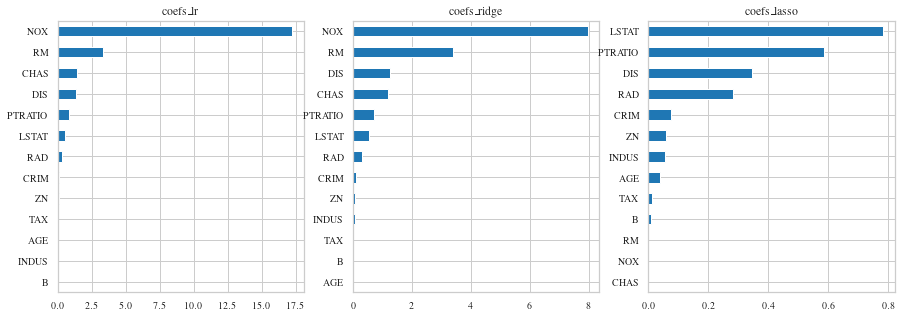

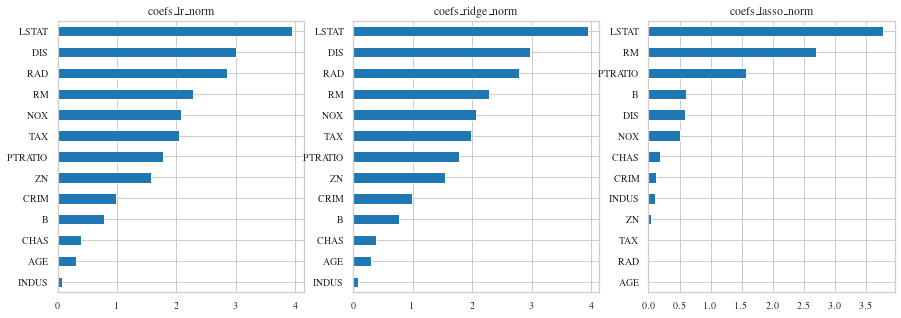

In [ ]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

coefs_lr.plot(kind="barh", title='coefs_lr', ax=ax1)
coefs_ridge.plot(kind="barh", title='coefs_ridge', ax=ax2)
coefs_lasso.plot(kind="barh", title='coefs_lasso', ax=ax3)

plt.savefig("files/ch06/CompareCoeff1.png", dpi = 300, bbox_inches = 'tight')

f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

coefs_lr_norm.plot(kind="barh", title='coefs_lr_norm', ax=ax1)
coefs_ridge_norm.plot(kind="barh", title='coefs_ridge_norm', ax=ax2)
coefs_lasso_norm.plot(kind="barh", title='coefs_lasso_norm', ax=ax3)

plt.savefig("files/ch06/CompareCoeff2.png", dpi = 300, bbox_inches = 'tight')

In [ ]:
print('Non important variables:')
print('Before transformation: {}'.format(sorted(coefs_lasso.index[coefs_lasso_norm==0].values)))
print('After transformation: {}'.format(sorted(coefs_lasso_norm.index[coefs_lasso_norm==0].values)))
print('Most important variable:')
print('Before transformation: {}'.format(coefs_lasso.index[-1]))
print('After transformation: {}'.format(coefs_lasso_norm.index[-1]))

Non important variables:
Before transformation: ['CHAS', 'NOX', 'RM']
After transformation: ['AGE', 'RAD', 'TAX']
Most important variable:
Before transformation: LSTAT
After transformation: LSTAT


In [ ]:
# Scores
print('lr: {}'.format(lr.score(X_test, y_test)))
print('ridge: {}'.format(ridge.score(X_test, y_test)))
print('lasso: {}'.format(lasso.score(X_test, y_test)))
print('lr_norm: {}'.format(lr_norm.score(X_test_norm, y_test)))
print('ridge_norm: {}'.format(ridge_norm.score(X_test_norm, y_test)))
print('lasso_norm: {}'.format(lasso_norm.score(X_test_norm, y_test)))

lr: 0.7397314185094677
ridge: 0.7349349295551422
lasso: 0.6205285241385128
lr_norm: 0.7397314185094664
ridge_norm: 0.7396948548535951
lasso_norm: 0.695827596849349


### Tuning Ridge and Lasso regressors

In [ ]:
n_alphas = 100
alphas = np.logspace(-2, 2, n_alphas)

coefs_ridge = []
r2_ridge = []
for a in alphas:
    regr_ridge = linear_model.Ridge(alpha=a) # Create a Ridge regressor
    regr_ridge.fit(X_train_norm, y_train)  # Perform the fitting
    coefs_ridge.append(regr_ridge.coef_)
    r2_ridge.append(regr_ridge.score(X_test_norm,y_test))


coefs_lasso = []
r2_lasso = []
for a in alphas:
    regr_lasso = linear_model.Lasso(alpha=a,tol =0.001) # Create a Ridge regressor
    regr_lasso.fit(X_train_norm, y_train)  # Perform the fitting
    coefs_lasso.append(regr_lasso.coef_)
    r2_lasso.append(regr_lasso.score(X_test_norm,y_test))

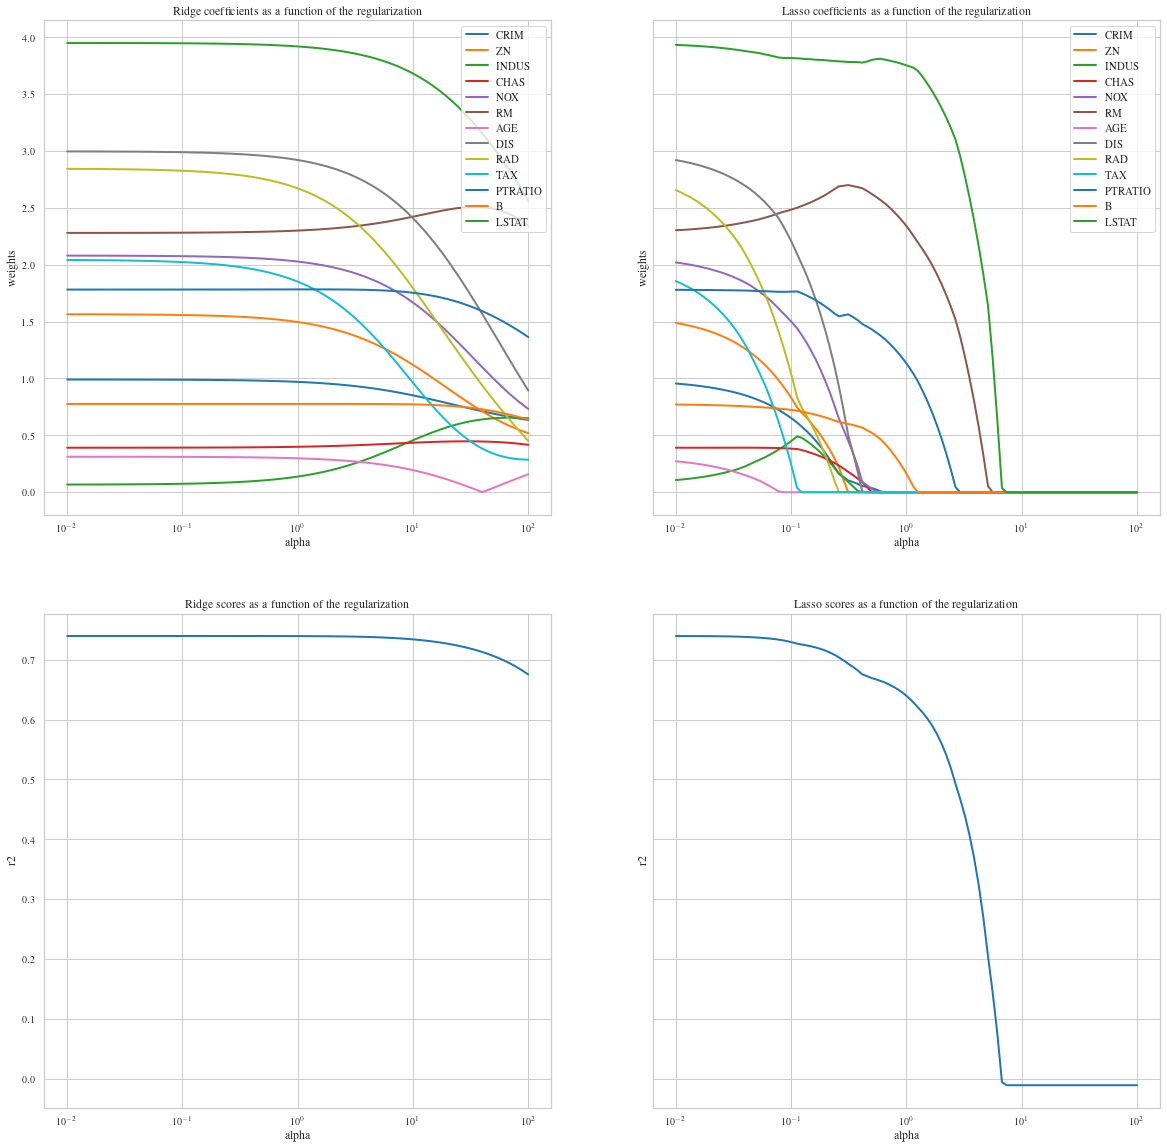

In [ ]:
# Display results

fig, axs = plt.subplots(2, 2, figsize=(20, 20), sharey='row')

axs[0,0].plot(alphas, np.abs(coefs_ridge))
axs[0,0].set_xscale('log')
axs[0,0].set_title('Ridge coefficients as a function of the regularization')
axs[0,0].axis('tight')
axs[0,0].set_xlabel('alpha')
axs[0,0].set_ylabel('weights')
axs[0,0].legend(boston.feature_names)

axs[0,1].plot(alphas, np.abs(coefs_lasso))
axs[0,1].set_xscale('log')
axs[0,1].set_title('Lasso coefficients as a function of the regularization')
axs[0,1].axis('tight')
axs[0,1].set_xlabel('alpha')
axs[0,1].set_ylabel('weights')
axs[0,1].legend(boston.feature_names)

axs[1,0].plot(alphas, r2_ridge)
axs[1,0].set_xscale('log')
axs[1,0].set_title('Ridge scores as a function of the regularization')
axs[1,0].axis('tight')
axs[1,0].set_xlabel('alpha')
axs[1,0].set_ylabel('r2')

axs[1,1].plot(alphas, r2_lasso)
axs[1,1].set_xscale('log')
axs[1,1].set_title('Lasso scores as a function of the regularization')
axs[1,1].axis('tight')
axs[1,1].set_xlabel('alpha')
axs[1,1].set_ylabel('r2')

plt.show()
#plt.savefig("files/ch06/TunningRegressors.png", dpi = 300, bbox_inches = 'tight')

In [ ]:
# Find optimal alphas
best_r2_ridge = max(r2_ridge)
max_index_ridge = r2_ridge.index(best_r2_ridge)
best_alpha_ridge = alphas[max_index_ridge]
print('Ridge')
print(max_index_ridge, best_alpha_ridge, best_r2_ridge, r2_ridge[max_index_ridge])

best_r2_lasso = max(r2_lasso)
max_index_lasso = r2_lasso.index(best_r2_lasso)
best_alpha_lasso = alphas[max_index_lasso]
print('Lasso')
print(max_index_lasso, best_alpha_lasso, best_r2_lasso, r2_lasso[max_index_lasso])

Ridge
0 0.01 0.7397305570850639 0.7397305570850639
Lasso
0 0.01 0.7396623210949959 0.7396623210949959


We can also select the most important features with sklearn:

In [ ]:
import sklearn.feature_selection as fs
selector = fs.SelectKBest(score_func = fs.f_regression, k=5)

X_new_train = selector.fit_transform(X_train,y_train)
X_new_test = selector.transform(X_test)

print('Non important variables: {}'.format(boston.feature_names[selector.get_support()==False]))
print('Relevant variables: {}'.format(boston.feature_names[selector.get_support()]))

Non important variables: ['CRIM' 'ZN' 'CHAS' 'AGE' 'DIS' 'RAD' 'TAX' 'B']
Relevant variables: ['INDUS' 'NOX' 'RM' 'PTRATIO' 'LSTAT']


The set of selected features is now different, since the criterion has changed. SelectKBest method selects features according to the k highest scores. The scored is calculated using the score_func.
In this case, we use f_regression as our scoring function, which returns the F-statistic and p-values of univariate linear regression tests from each feature in X against y.

### Plots for the fitting evaluation:

We can often learn a lot about how well our model did by analyzing the predictions and residuals with two interesting plots:
- A scatter plot of the observed values $y$ versus the predicted value $\hat y$
- A scatter plot of the residuals $y_i - \hat y_i$ versus $\hat y_i$.

In both cases we can add a line to show which would be the perfect result.

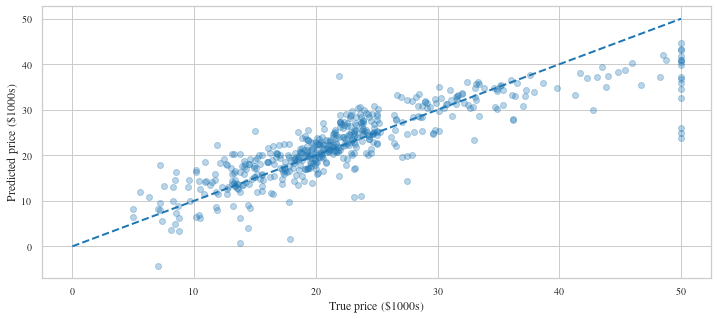

In [ ]:
# Visualization of target and predicted responses
reg = LinearRegression()
reg.fit(boston.data, boston.target)
y_pred = reg.predict(boston.data)
plt.scatter(boston.target, y_pred, alpha = 0.3)
plt.plot([0, 50], [0, 50], '--')
plt.axis('tight')
plt.xlabel('True price (\$1000s)')
plt.ylabel('Predicted price (\$1000s)')
plt.savefig("files/ch06/relationTruePredictedPrices.png", dpi = 300, bbox_inches = 'tight')

The model seem to be a good fitting except for the more expensive houses.

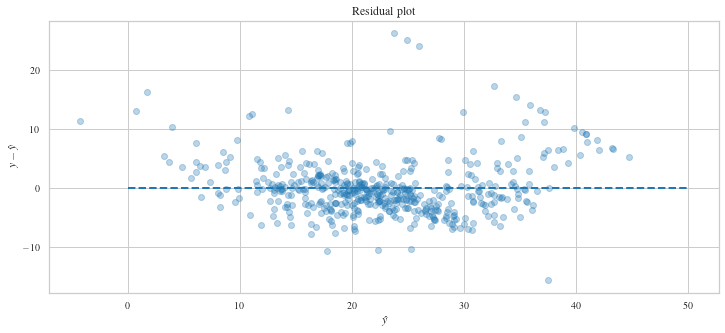

In [ ]:
x_plot = plt.scatter(y_pred, (y-y_pred), alpha = 0.3)
plt.hlines(y=0, xmin= 0, xmax=50, linestyles='dashed')
plt.title('Residual plot')
plt.xlabel('$\hat y$')
plt.ylabel('$y - \hat y$')
plt.savefig("files/ch06/ResidualPlot.png", dpi = 300, bbox_inches = 'tight')

Intuitively, if the model is good, then a plot of the residuals ($y_i - \hat y_i$) against the fitted values ($\hat y_i$) should look like noise (i.e., there shouldn't be any visible patterns).

### Statistical evaluation

The ``statsmodels`` package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the OLS module.

We can perform the regression of the predictor on the response, using the ``sm.OLS`` class and its initialization ``OLS(y, X)`` method. This method takes as an input two array-like objects: $X$ and $\textbf{y}$. In general, $X$ will either be a numpy array or a pandas data frame with shape ``(n, d)`` where $n$ is the number of data points and $d$ is the number of predictors, and $\textbf{y}$ is a 1-dimensional numpy array.

In [ ]:
import statsmodels.api as sm
X2 = X_boston[:,12] # Let's use column 12 (LSTAT) to perform a regression:
X12 = sm.add_constant(X2)  # Adds a constant term to the predictor
est = sm.OLS(y_boston, X2) # Creates an object OLS estimator
est = est.fit() # Does the fitting
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Tue, 25 Jul 2023   Prob (F-statistic):                    2.71e-67
Time:                        14:28:01   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1221      0.055     20.271      0.000       1.013       1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic Regresion (Scikit-learn)

**Logistic regression** or logit regression is a type of probabilistic statistical classification model. It is also used to predict a binary response from a binary predictor, used for predicting the outcome of a categorical dependent variable (i.e., a class label) based on one or more predictor variables (features).

(Source: *Wikipedia*)

The logistic function is:

$$ f(x) = \frac{1}{1+e^{- \lambda x}}$$

The logistic function is useful because it can take an input with any value from negative infinity to positive infinity, whereas the output  is confined to values between 0 and 1 and hence is interpretable as a probability.

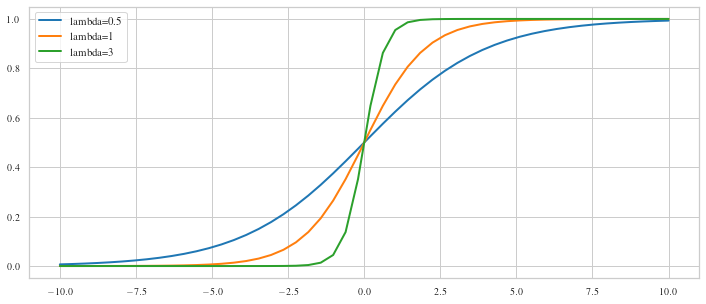

In [ ]:
def logist(x,l):
    return 1/(1+np.exp(-l*x))

x = np.linspace(-10, 10) # 50 points equally spaced from -10 to 10
t = logist(x, 0.5)
y = logist(x, 1)
z = logist(x, 3)
plt.plot(x, t, label = 'lambda=0.5')
plt.plot(x, y, label = 'lambda=1')
plt.plot(x, z, label = 'lambda=3')
plt.legend(loc = 'upper left')
plt.savefig("files/ch06/LogisticRegression.png", dpi = 300, bbox_inches = 'tight')

In [ ]:
def lr_model(x):
    return 1 / (1 + np.exp(-x))

/var/folders/z8/lf08cst56rv_dv3_7mrpfhcm0000gn/T/ipykernel_6139/2869797826.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


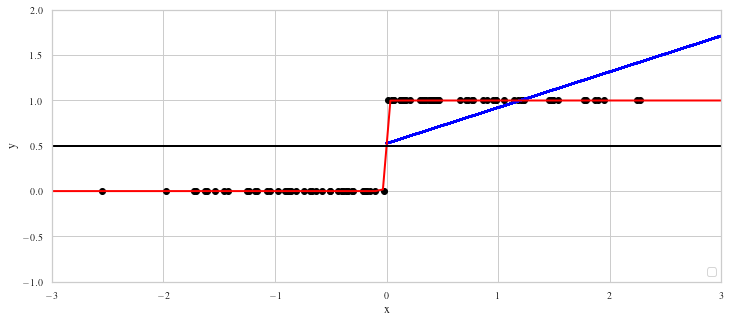

In [ ]:
xmin, xmax = -10, 10
np.random.seed(0)
X = np.random.normal(size = 100)

y = (X > 0).astype(float)
X = X[:, np.newaxis]

# Linear Regression:
ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, color = 'blue', linewidth = 2)

# Logistic Regression:
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# Drawing:
X_test = np.linspace(-10, 10, 300)
loss = lr_model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color = 'red', linewidth = 2)

plt.axhline(0.5, color = 'black')

plt.scatter(X, y, color = 'black')

plt.legend(loc = 'lower right')
plt.ylabel('y')
plt.xlabel('x')

plt.ylim(-1, 2)
plt.xlim(-3, 3)

plt.savefig("files/ch06/LinearvsLR.png", dpi = 300, bbox_inches = 'tight')

### Practical case 3: Winning or Losing Football Team

We want to predict victory or defeat in a football match when we are given the number of goals a team scores.
To do this we consider the set of results of the football matches from the Spanish league and we build a classification model with it. We follow the steps:
+ Read this file in a pandas DataFrame: http://www.football-data.co.uk/mmz4281/1213/SP1.csv
+ Select these columns in a new DataFrame: 'HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR'. (FTHG: Home team goals, FTAG: Away team goals, FTR: H=Home Win, D=Draw, A=Away Win)
+ Visualize a scatter plot of FTHG versus FTAG.
+ Built a $X$ 1-d predictor with all scores and a $y$ binary variable indicating win or loss.
+ Compute and visualize a logistic regression.
+ Which is the cut value?

In [ ]:
# Season 2012/2013
file = 'files/ch06/SP1.csv' # file = 'http://www.football-data.co.uk/mmz4281/1213/SP1.csv'
data_football = pd.read_csv(file)
s = data_football[['HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR']]

In [ ]:
s.head() # (H=Home Win, D=Draw, A=Away Win)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Celta,Malaga,0,1,A
1,Mallorca,Espanol,2,1,H
2,Sevilla,Getafe,2,1,H
3,Ath Bilbao,Betis,3,5,A
4,Barcelona,Sociedad,5,1,H


Can we predict if we have a win or loss if we are given a score?

Text(0, 0.5, 'Away team goals (FTAG)')

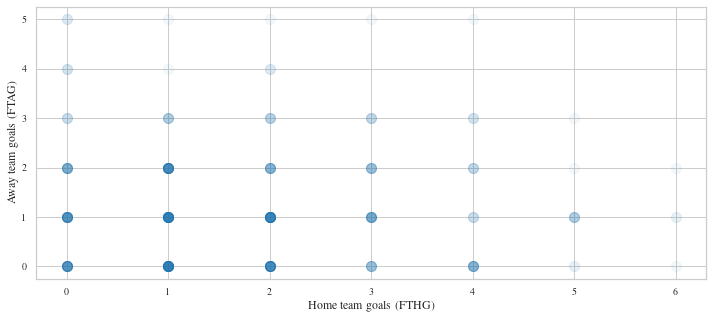

In [ ]:
# Visualization with scatter the number of goals
plt.scatter(s.FTHG, s.FTAG, s = 100, alpha = 0.05)
# s, size of the points, alpha, blending value, between 0 (transparent) and 1 (opaque).
plt.xlabel('Home team goals (FTHG)')
plt.ylabel('Away team goals (FTAG)')

In [ ]:
# Create two extra columns containing 'W' the number of goals of the winner and 'L' the number of goals of the losser
def my_f1(row):
    return max(row['FTHG'], row['FTAG'])

def my_f2(row):
    return min(row['FTHG'], row['FTAG'])

# Add 2 new columns to the panda:
s.loc[:,'W'] = s.apply(my_f1, axis = 1)
s.loc[:,'L'] = s.apply(my_f2, axis = 1)


/var/folders/z8/lf08cst56rv_dv3_7mrpfhcm0000gn/T/ipykernel_6139/2710216134.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,'W'] = s.apply(my_f1, axis = 1)
/var/folders/z8/lf08cst56rv_dv3_7mrpfhcm0000gn/T/ipykernel_6139/2710216134.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,'L'] = s.apply(my_f2, axis = 1)


In [ ]:
s.info()
s.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  380 non-null    object
 1   AwayTeam  380 non-null    object
 2   FTHG      380 non-null    int64 
 3   FTAG      380 non-null    int64 
 4   FTR       380 non-null    object
 5   W         380 non-null    int64 
 6   L         380 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 20.9+ KB


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,W,L
0,Celta,Malaga,0,1,A,1,0
1,Mallorca,Espanol,2,1,H,2,1
2,Sevilla,Getafe,2,1,H,2,1
3,Ath Bilbao,Betis,3,5,A,5,3
4,Barcelona,Sociedad,5,1,H,5,1


In [ ]:
# Create the data and target
import numpy as np
x1 = s['W'].values
y1 = np.ones(len(x1), dtype = int)
x2 = s['L'].values
y2 = np.zeros(len(x2), dtype = int)

x = np.concatenate([x1, x2])
x = x[:, np.newaxis]
y = np.concatenate([y1, y2])


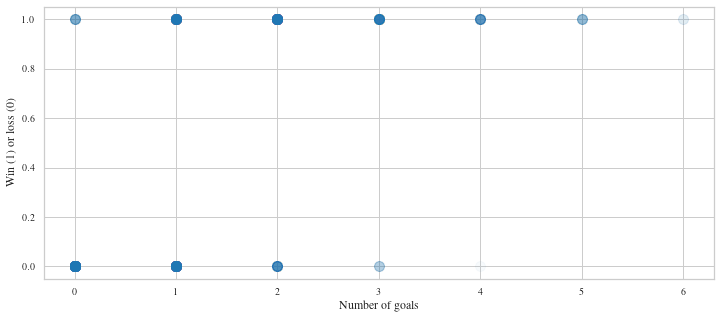

In [ ]:
# Plot the data
plt.scatter(x, y, s = 100, alpha = 0.03)
plt.xlabel('Number of goals')
plt.ylabel('Win (1) or loss (0)')
plt.savefig("files/ch06/scatterLossWin.png", dpi = 300, bbox_inches = 'tight')

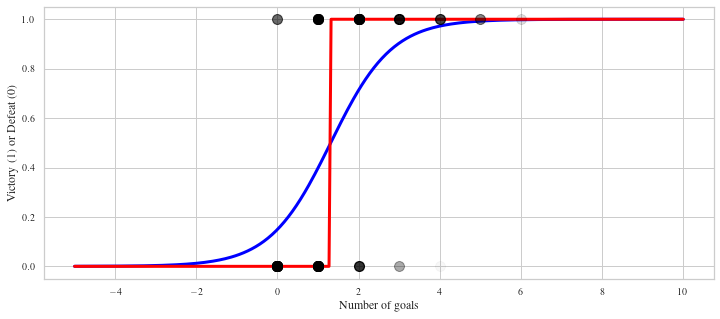

In [ ]:
# Fitting of a Logistic Regression and prediction using the model:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x, y)

X_test = np.linspace(-5, 10, 300)

loss = lr_model(X_test * logreg.coef_ + logreg.intercept_).ravel()

X_test2 = X_test[:, np.newaxis]
losspred = logreg.predict(X_test2)

plt.scatter(x.ravel(), y, color = 'black', s = 100, zorder = 20, alpha = 0.03)
plt.plot(X_test, loss, color = 'blue', linewidth = 3)
plt.plot(X_test, losspred, color = 'red', linewidth = 3)
plt.xlabel('Number of goals')
plt.ylabel('Victory (1) or Defeat (0)')
plt.savefig("files/ch06/logregPrediction.png", dpi = 300, bbox_inches = 'tight')

With this information we can estimate that the cut off value is 1. This means that a team has to score more than one goal to win.